# Food Addictives Impact On Health

 This project investigates the relationship between dietary
 behavior, food additives,
 and self-perceived health using a combination of structured and
 unstructured data.
 It begins with survey data analysis, applying feature engineering,
 exploratory data
 analysis (EDA), and machine learning models to predict how
 eating habits relate to
 health perception. In parallel, Natural Language Processing (NLP)
 techniques are used
 to analyze sentiment and thematic patterns from media articles
 and scientific abstracts
 concerning food additives. Together, these analyses aim to
 uncover both behavioral trends
 and public concerns, offering insights for food businesses, health
 advocates, and policymakers.

## Importing Necessary Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Loading and Exploration

In [ ]:
#import the dataset
df = pd.read_excel("/content/cleanedfooddata.xlsx")

In [ ]:
#check the first five rows
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,3.654,1,1,610,3,420,2,"chocolate, chips, ice cream","Stress, bored, anger",1,...,1,1,2,725,690,Basketball,4,2,900,155
1,3.300,1,1,720,4,420,2,"frozen yogurt, pizza, fast food","stress, sadness",1,...,1,2,5,1165,500,none,5,1,900,I'm not answering this.
2,3.500,1,1,720,2,420,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1,...,1,1,4,940,500,Softball,4,2,760,190
3,3.800,2,1,610,3,420,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1,...,1,1,5,940,690,soccer,4,1,1315,180
4,3.300,1,1,720,3,420,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1,...,1,2,1,725,500,none,4,2,1315,137


In [ ]:
#check the last five rows
df.tail()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
46,3.00,1,1,610,3,420,2,"Chinese food, moes, sponge candy, homemade las...","boredom, sadness",2,...,1,1,4,580,500,"volleyball, lacrosse",4,1,900,190
47,3.20,2,1,720,3,420,1,"pizza, pasta, mac and cheese",when i am sad or craving,3,...,1,1,1,1165,690,field hockey,4,1,1315,155
48,3.80,1,2,610,2,420,2,"Macaroni and cheese, chicken noodle soup, pizza",Boredom and stress,2,...,1,2,1,725,500,crew,1,2,900,135
49,3.92,2,1,430,3,420,2,"Ice cream, cake, pop, pizza, and milkshakes.","Happiness, sadness, celebration.",7,...,1,2,3,725,500,Soccer,2,1,900,210
50,3.70,1,1,610,3,420,2,"dark chocolate, terra chips, reese's cups(dark...","Anxiousness, watching TV I desire ""comfort food""",8,...,1,2,3,725,345,"When I can, rarely though play pool, darts, an...",5,1,760,130


In [ ]:
#check for missing values
df.isna().sum().sum()

np.int64(0)

The check for missing values show that there are no missing values in the dataset. So the next step in the exploration will be to check for duplicates

In [ ]:
#check for duplicates
df.duplicated().any()

np.False_

No duplicate as well

In [ ]:
#check the number of rows and columns in the dataset
df.shape

(51, 61)

## Exploratory Data Analysis (EDA)

**Univariate Analysis on the Numerical Columns**

In [ ]:
#define the numerical columns
numeric_columns = ['calories_chicken', 'calories_day', 'calories_scone',
                  'fruit_day', 'veggies_day', 'tortilla_calories',
                  'turkey_calories', 'waffle_calories', 'weight', 'GPA']

#format the columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


Numerical Columns Distribution Analysis:


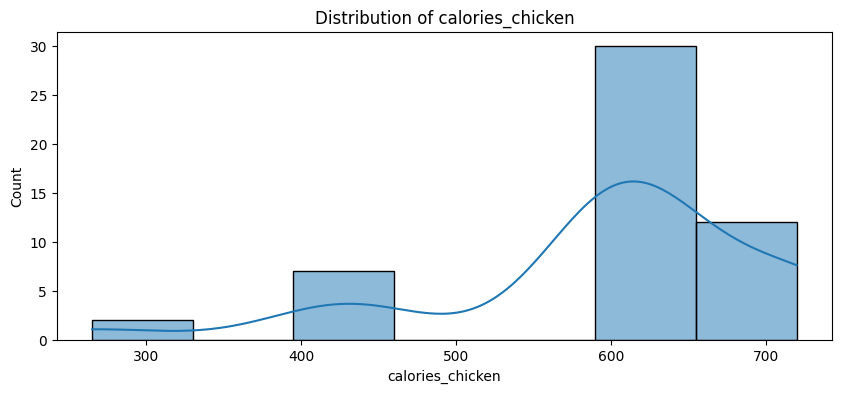

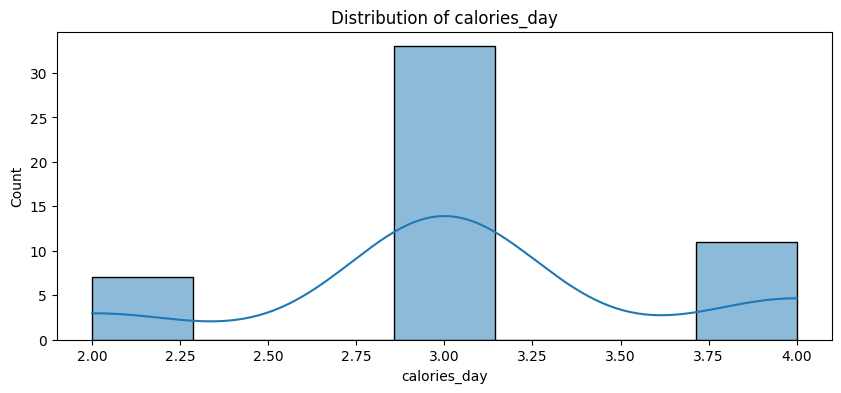

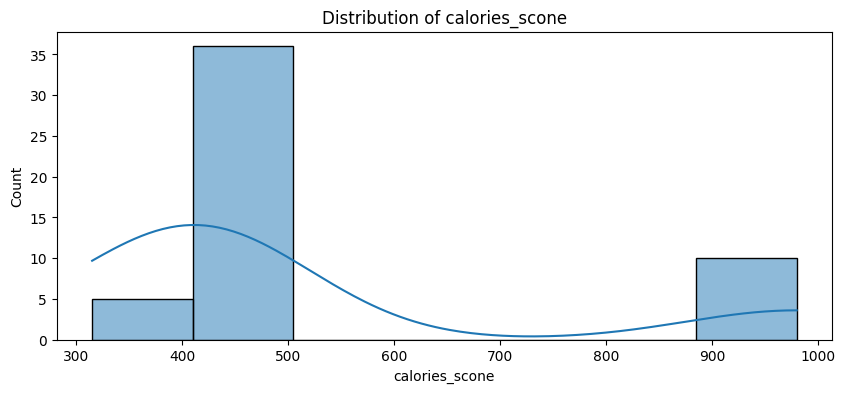

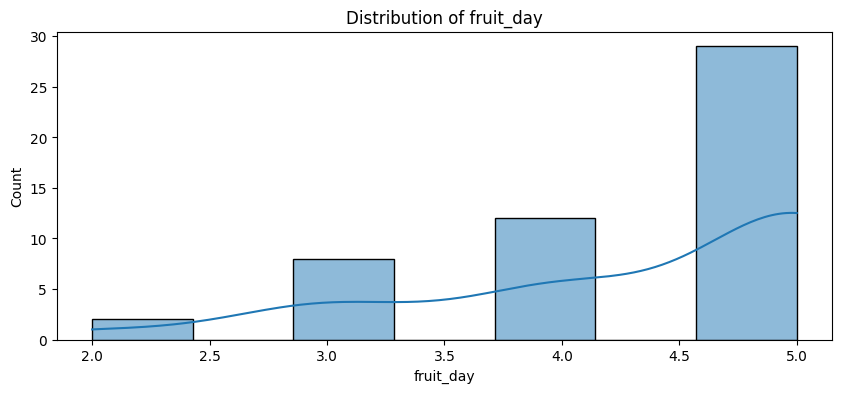

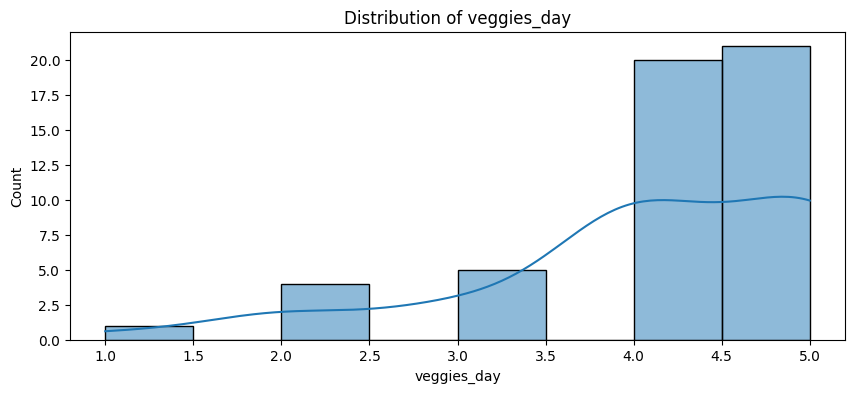

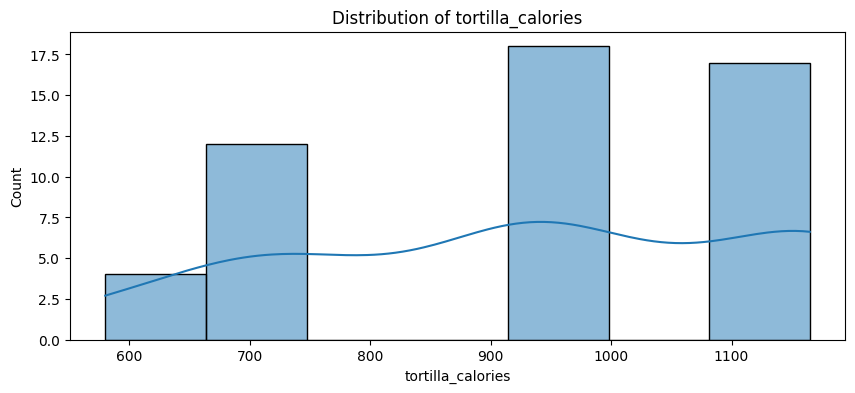

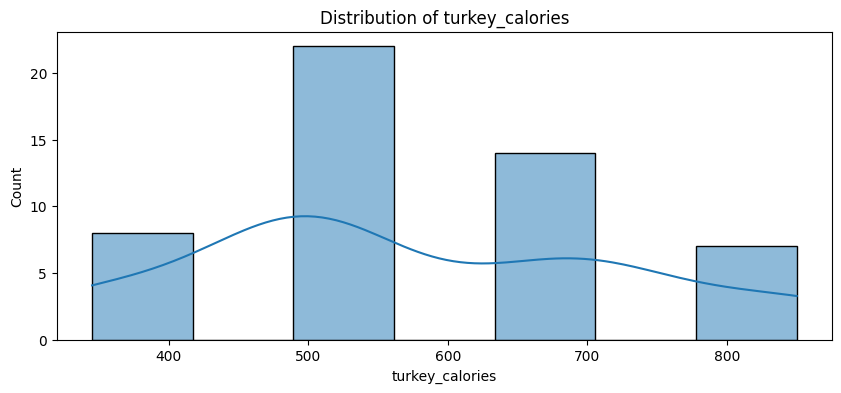

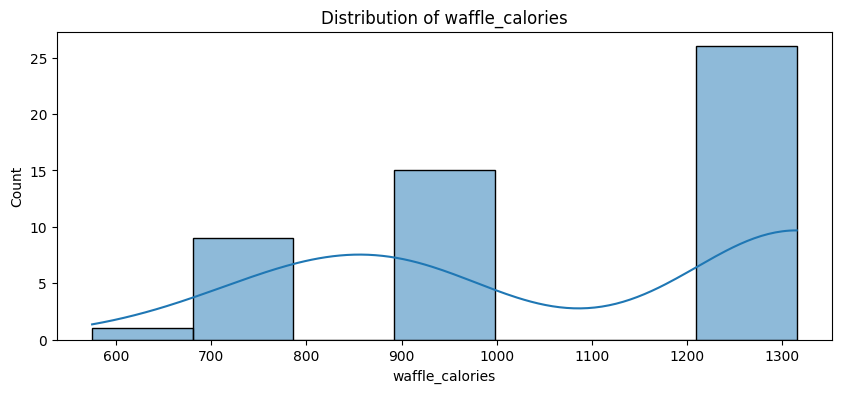

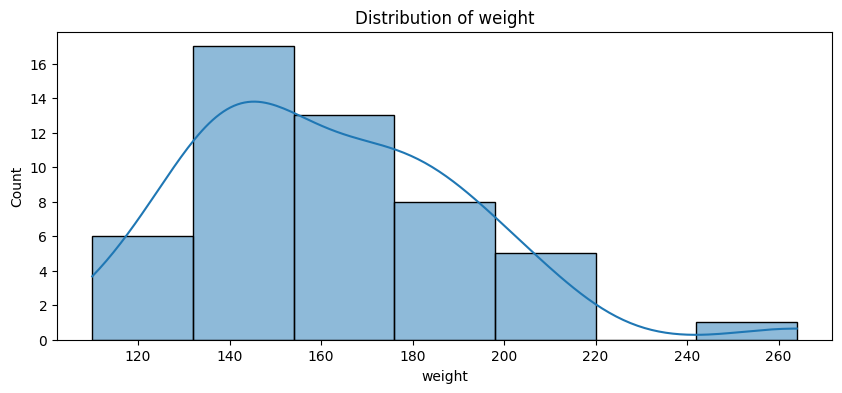

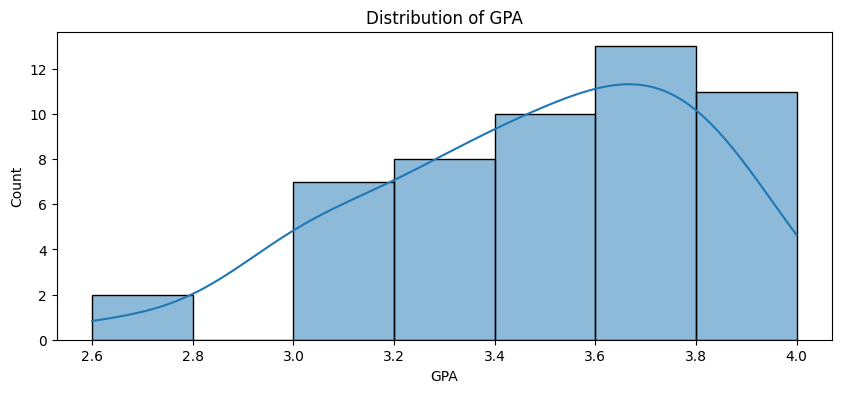

In [ ]:
#continuous variables analysis
print("\nNumerical Columns Distribution Analysis:")
for var in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

 The above code loops through each numeric column in the
 dataset and generates a histogram with a kernel density estimate
 (KDE) overlay. This helps visualize how each feature is distributed
 — whether it's normally distributed, skewed, or has outliers.
 These visual checks are useful for understanding the structure of
 the data and deciding whether any transformation or scaling
 These visual checks are useful for understanding the structure of
 the data and deciding whether any transformation or scaling
might be needed before modeling.

**Univariate Analysis on Categorical Variables**


Categorical Variables Analysis:


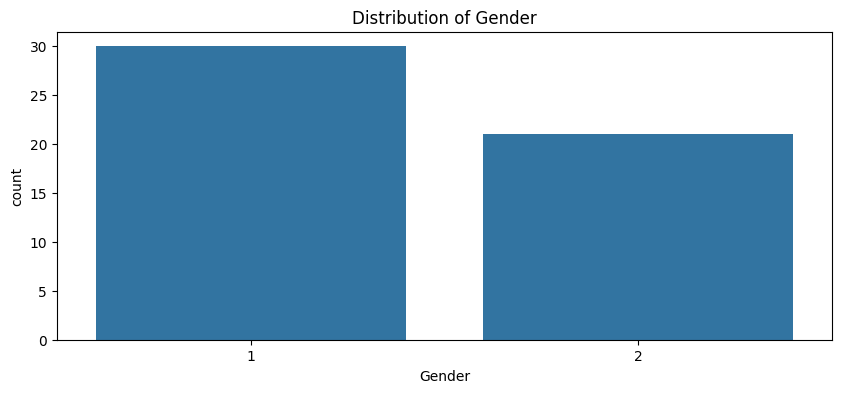

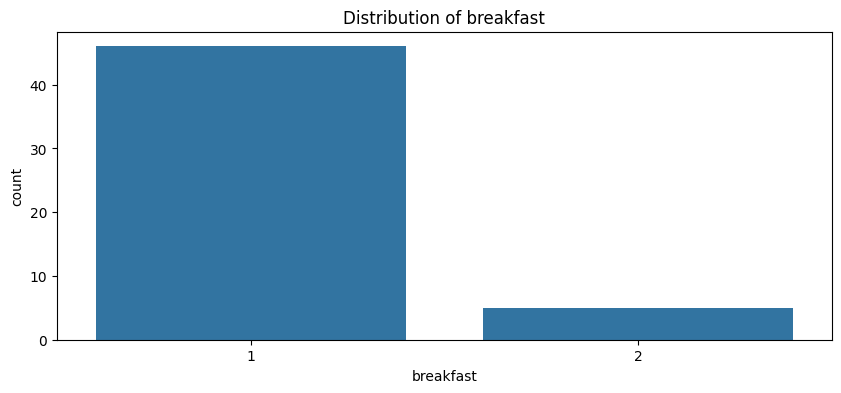

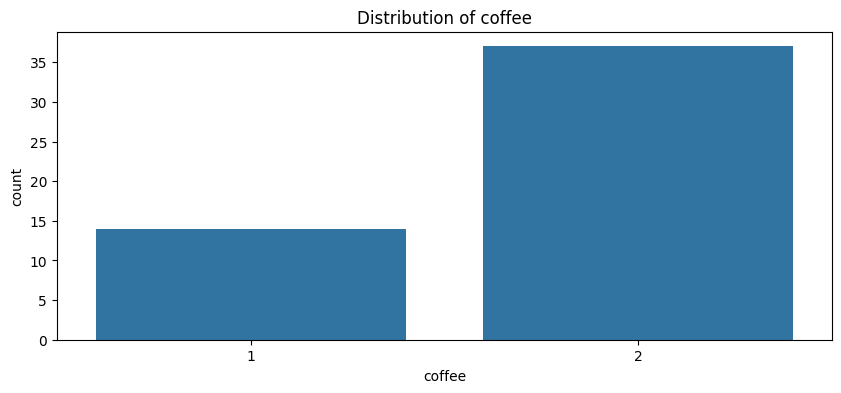

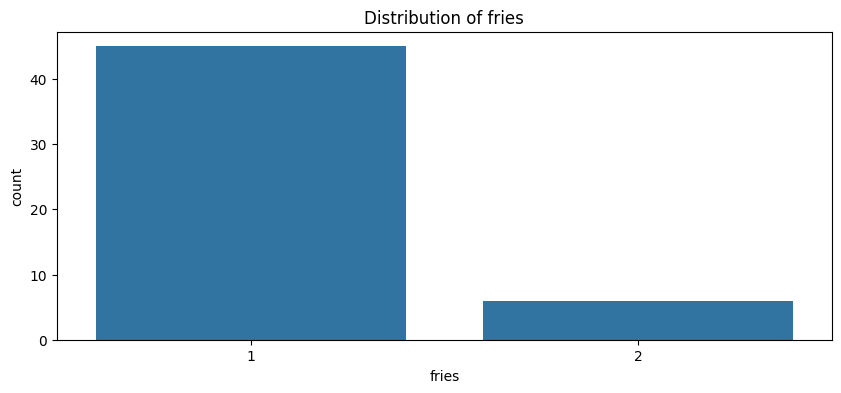

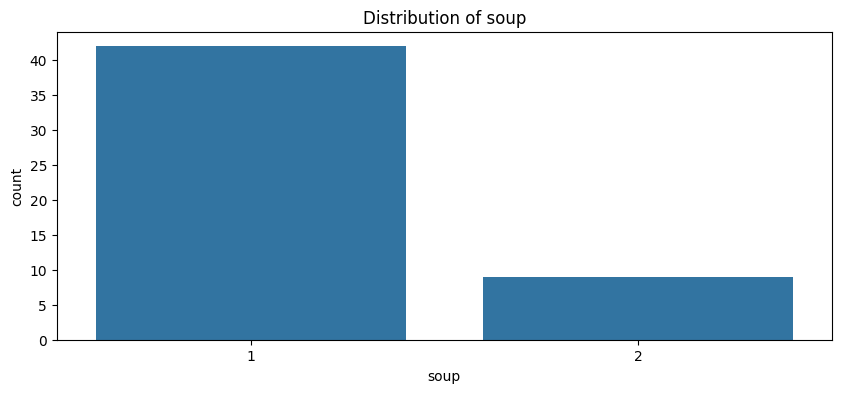

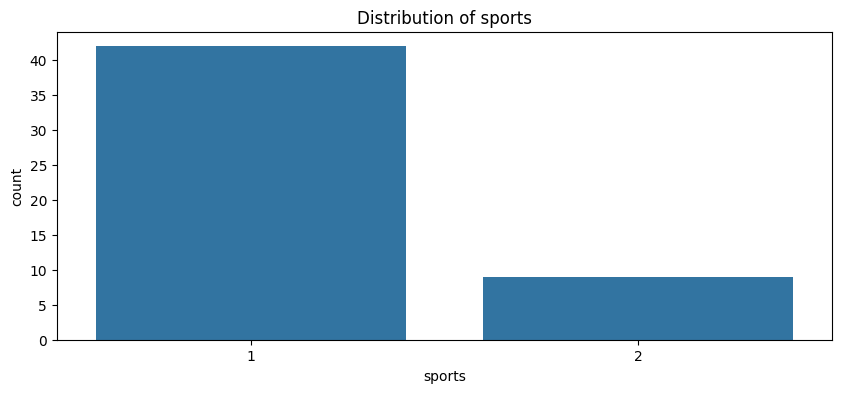

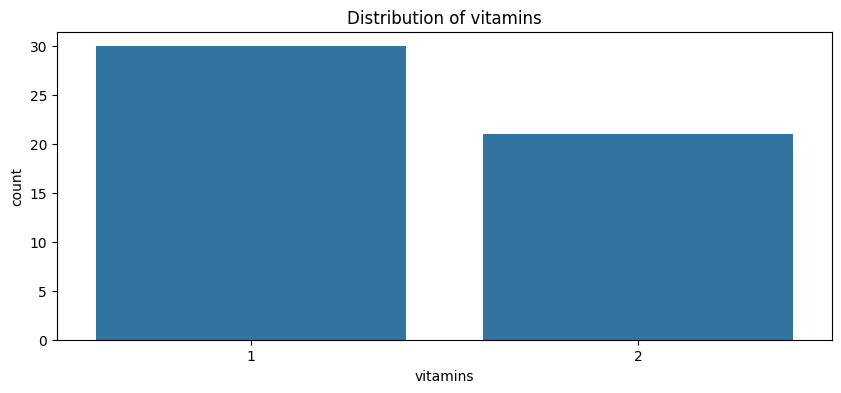

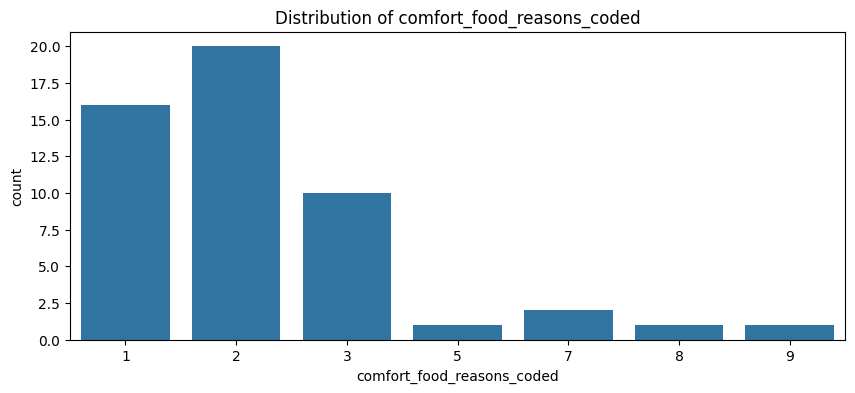

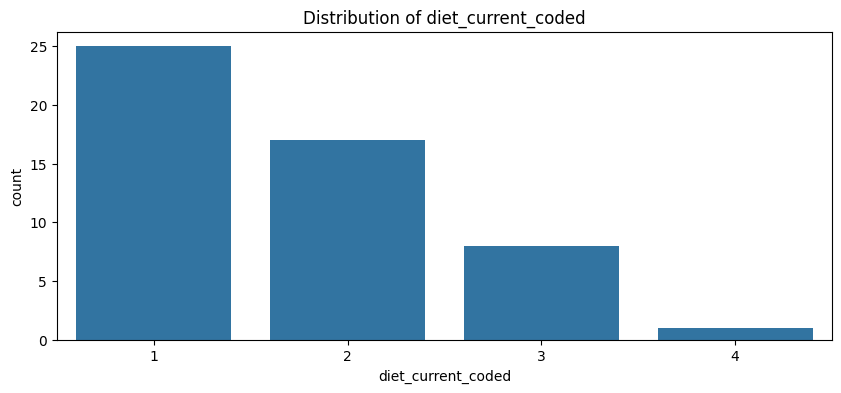

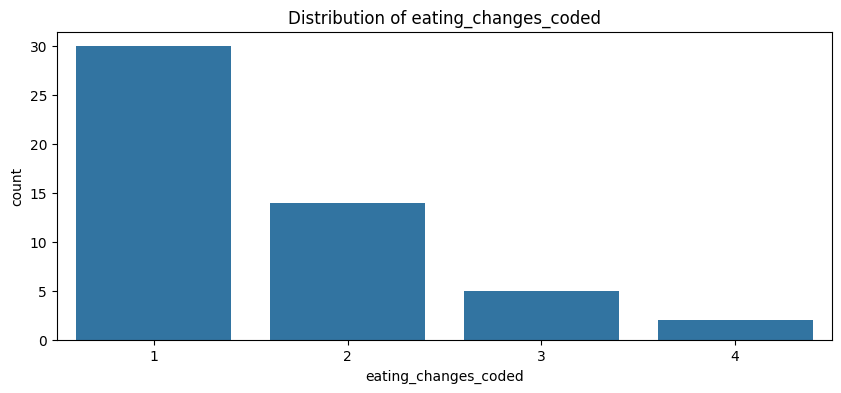

In [ ]:
#define the categorical variables
categorical_columns = ['Gender', 'breakfast', 'coffee', 'fries', 'soup',
                      'sports', 'vitamins', 'comfort_food_reasons_coded',
                      'diet_current_coded', 'eating_changes_coded']

#plot the distribution
print("\nCategorical Variables Analysis:")
for var in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.show()

This section defines the key categorical variables in the dataset
 and generates count plots to visualize the distribution of
 responses for each one. By showing how often each category
 appears like 'types of current diets, use of vitamins, or reasons for
 comfort food', the analysis helps reveal dominant behaviours or
 preferences among respondents. These visualizations also
 highlight potential class imbalances or underrepresented
 categories that might affect model performance or interpretation

**Bivariate Anaysis**

After Univariate Analysis has been completed and different distribution of each variable has been observed, the next step is to analyze the relationship between two or more varibales

**Analyzing GPA by Daily Vegetable Consumption**

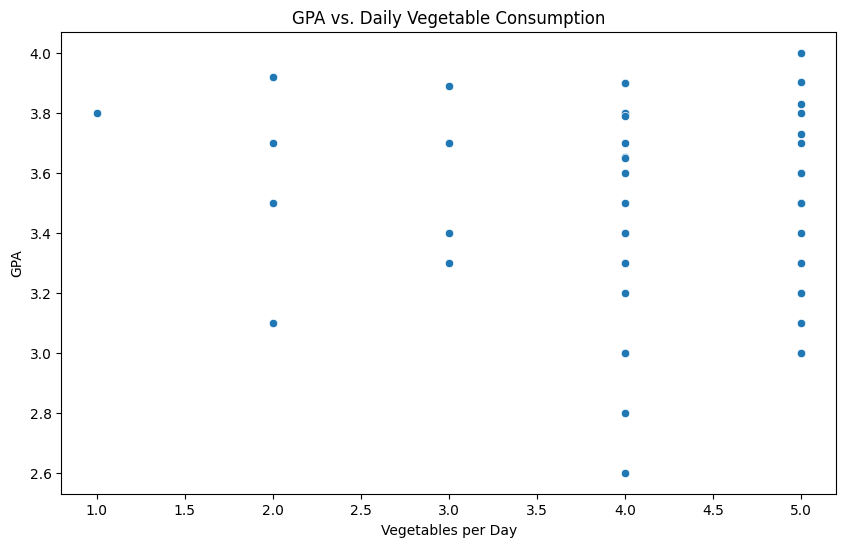

In [ ]:
#gpa vs daily vegetable consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='veggies_day', y='GPA', data=df)
plt.title("GPA vs. Daily Vegetable Consumption")
plt.xlabel('Vegetables per Day')
plt.ylabel('GPA')
plt.show()

**Analyzing GPA by Daily Fruit Consumption**

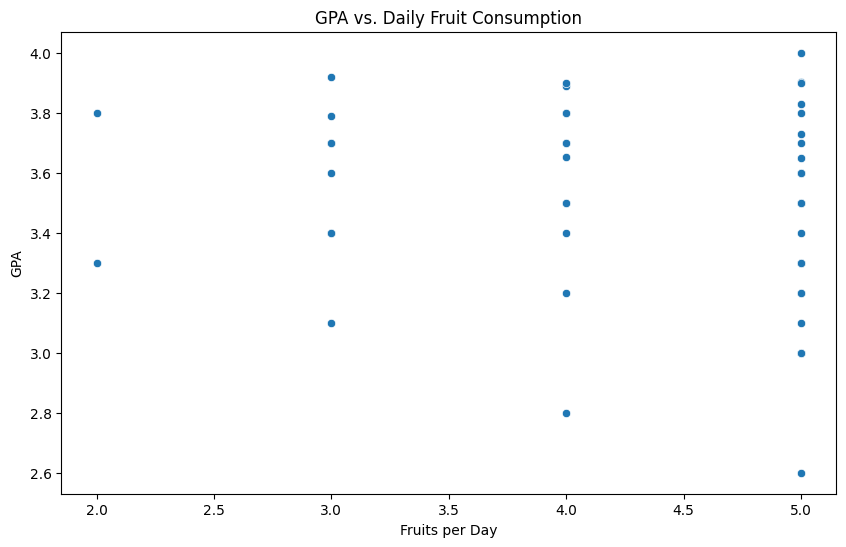

In [ ]:
#plot gpa vs daily fruit consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fruit_day', y='GPA', data=df)
plt.title("GPA vs. Daily Fruit Consumption")
plt.xlabel('Fruits per Day')
plt.ylabel('GPA')
plt.show()



The plots above explore how daily fruit and vegetable intake relate to GPA. There’s no strong visible trend, but students eating more fruits or vegetables seem to maintain a wide range of GPAs.


**The weight distribution by Gender**

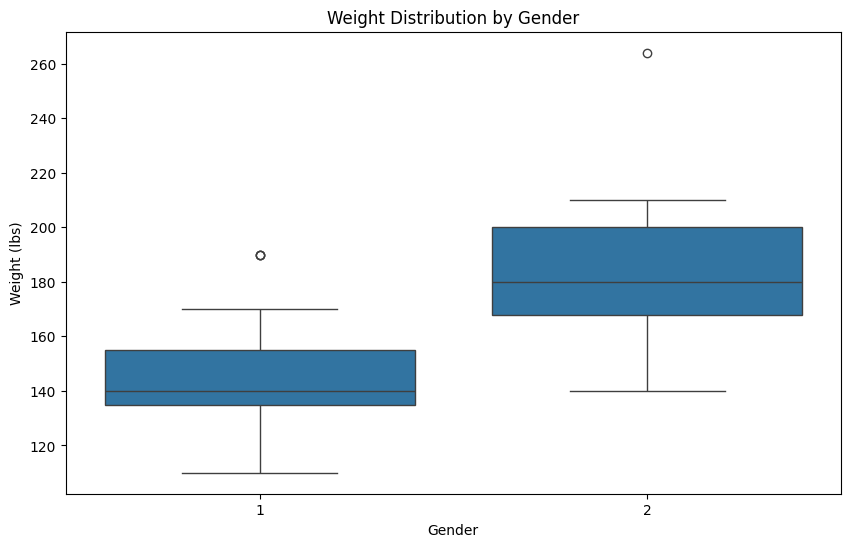

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='weight', data=df)
plt.title("Weight Distribution by Gender")
plt.xlabel('Gender')
plt.ylabel('Weight (lbs)')
plt.show()

**Weight Distribution by Exercise Frequency**

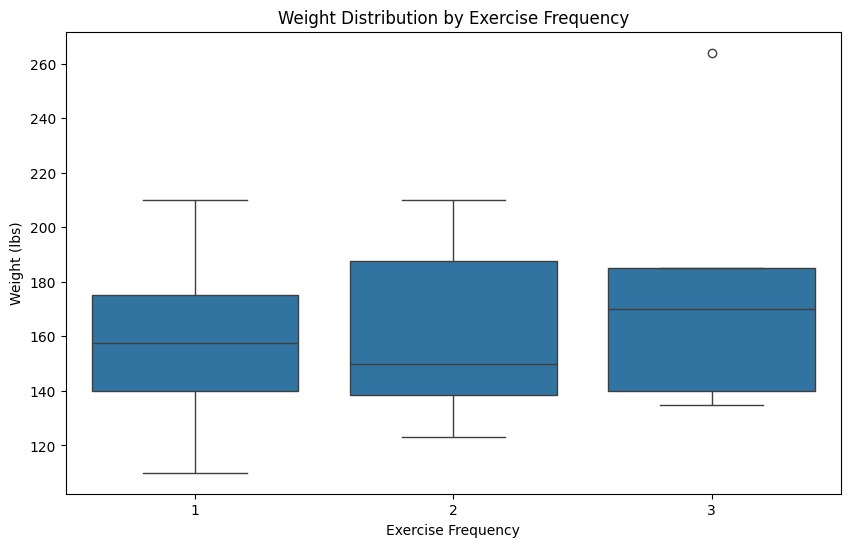

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exercise', y='weight', data=df)
plt.title("Weight Distribution by Exercise Frequency")
plt.xlabel('Exercise Frequency')
plt.ylabel('Weight (lbs)')
plt.show()

**Weight Distribution by Diet Type**

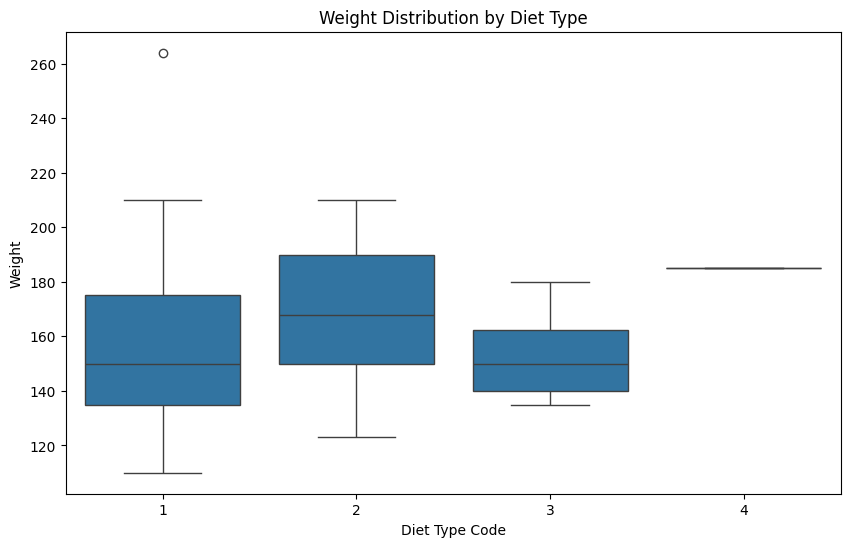

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diet_current_coded', y='weight', data=df)
plt.title("Weight Distribution by Diet Type")
plt.xlabel('Diet Type Code')
plt.ylabel('Weight')
plt.show()

Comments on the findings from Weight Analysis

* **By Exercise**: People who exercise more (especially 3×/week) tend to weigh more—possibly due to more muscle.
* **By Diet**: High-protein eaters weigh more on average. Balanced and low-carb diets are linked to lower, more stable weights.
* Gender seems to have the strongest link to weight differences.


**Calories Awareness Analysis**

This analysis involves the distribution of calorie estimations for different foods

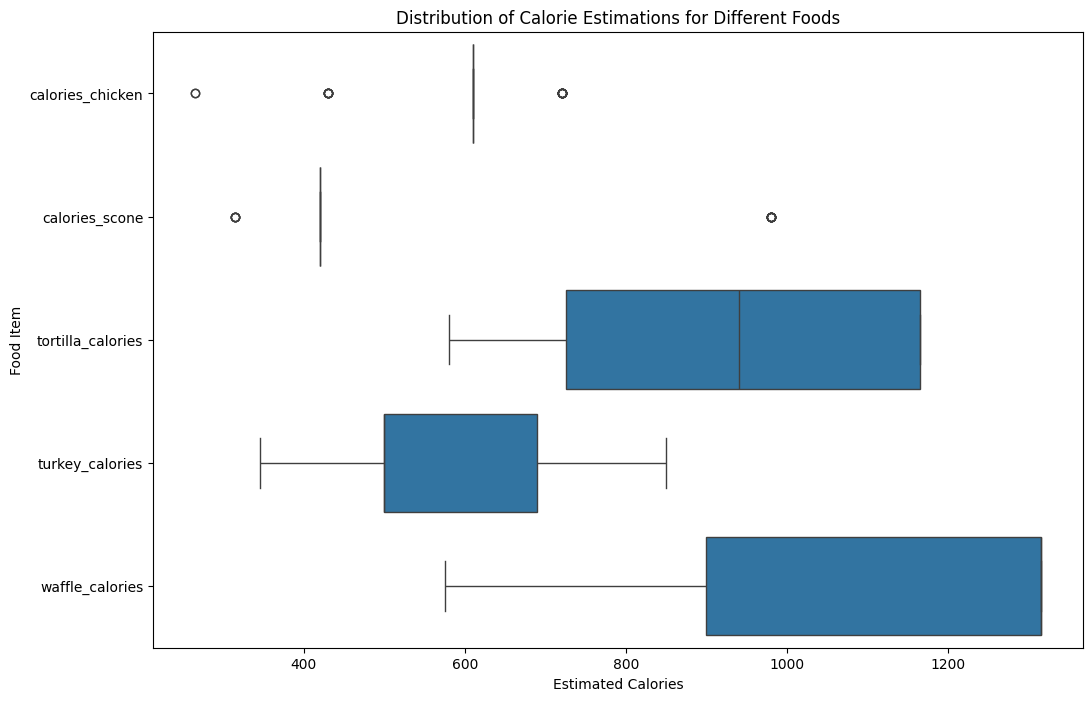

In [ ]:
#calorie awareness analysis
plt.figure(figsize=(12, 8))
calorie_cols = ['calories_chicken', 'calories_scone', 'tortilla_calories', 'turkey_calories', 'waffle_calories']
calorie_data = df[calorie_cols].melt()
sns.boxplot(y='variable', x='value', data=calorie_data)
plt.title("Distribution of Calorie Estimations for Different Foods")
plt.xlabel('Estimated Calories')
plt.ylabel('Food Item')
plt.show()



**Chicken**: Most people guessed similar calorie amounts; a few thought it was much lower, likely imagining lean portions.

**Scone**: Similar to chicken in calories but with slightly more disagreement, probably due to toppings or size.

**Turkey**: Higher calorie guesses than chicken, with lots of variation, some saw it as lean, others not.

**Tortilla Wrap**: Big jump in calories, guesses varied a lot depending on what is inside.

**Waffle**: Highest and most inconsistent calorie estimates, likely due to different ideas about syrup, butter, and portion size.

**Takeaway**: People agree more on plain proteins but struggle with estimating calories in mixed or topped foods like wraps and waffles.


**Correlation Analysis between key variables**

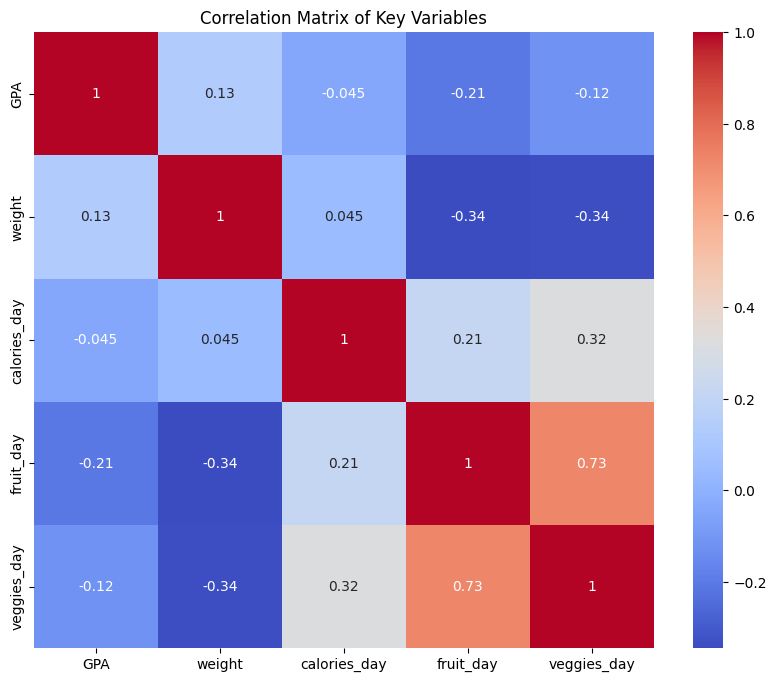

In [ ]:
correlation_vars = ['GPA', 'weight', 'calories_day', 'fruit_day', 'veggies_day']
correlation = df[correlation_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Key Variables")
plt.show()



**Fruit and Veggies**: People who eat more fruit usually eat more vegetables too.

**Calories and Veggies**: More calories often means more veggies in the diet.

**Calories and Fruit**: Slight positive link, but not strong.

**Weight and Fruit/Veggies**: Heavier people tend to eat less fruit and fewer vegetables.

**Weight and Calories**: No real connection — being heavier doesn’t mean eating more calories.

**GPA and Diet/Weight**: No real link between grades and what or how much people eat.

**Takeaway**:
Fruit and vegetable intake go together. Heavier individuals tend to report eating less produce. Calories and GPA don’t show clear patterns with diet or weight. These are just associations, not cause and effect.


**Vegatable Consumption by Healthy Feeling Rating**

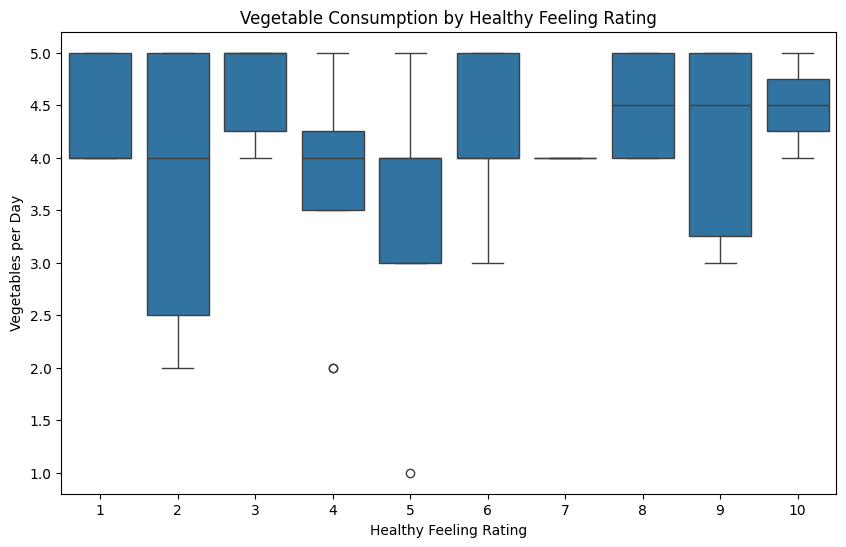

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='healthy_feeling', y='veggies_day', data=df)
plt.title("Vegetable Consumption by Healthy Feeling Rating")
plt.xlabel('Healthy Feeling Rating')
plt.ylabel('Vegetables per Day')
plt.show()

## Predictive Model Building

### Feature Enginnering

In [ ]:
#create new features
df['nutrition_balance'] = (df['fruit_day'] + df['veggies_day']) / (df['eating_out'] + 1)

#meal consistency metric
df['meal_consistency'] = df.groupby('diet_current_coded')['calories_day'].transform(
    lambda x: 1 - (x.std() / x.mean()))

print("\nAdvanced Features Created:")
print(df[['nutrition_balance', 'meal_consistency']].describe())


Advanced Features Created:
       nutrition_balance  meal_consistency
count          51.000000         50.000000
mean            2.716993          0.814234
std             0.966698          0.029215
min             0.750000          0.774773
25%             2.125000          0.774773
50%             2.500000          0.830232
75%             3.333333          0.838638
max             5.000000          0.838638


In [ ]:
#define class for the health feeling
df['healthy_feeling_binary'] = df['healthy_feeling'].apply(lambda x: 1 if x >= 4 else 0)

Here, I converted the ‘healthy\_feeling’ scores into a binary format: 1 for scores 4 or above (feeling healthy), 0 for scores below 4 (not feeling healthy).


In [ ]:
#select the features to be used for training the predictive models
features = ['calories_day', 'fruit_day', 'veggies_day', 'exercise',
           'diet_current_coded', 'vitamins', 'weight', 'nutrition_balance', 'meal_consistency', 'breakfast', 'coffee',
            'fries', 'comfort_food_reasons_coded', 'soup', 'eating_changes_coded']
df[features].head()

,calories_day,fruit_day,veggies_day,exercise,diet_current_coded,vitamins,weight,nutrition_balance,meal_consistency,breakfast,coffee,fries,comfort_food_reasons_coded,soup,eating_changes_coded
0,3,4,4,1,2,2,155.0,2.666667,0.774773,1,2,1,1,1,1
1,4,5,5,2,3,1,NaN,3.333333,0.821826,1,2,1,1,1,1
2,2,4,4,1,2,2,190.0,2.666667,0.774773,1,2,1,1,1,3
3,3,4,4,1,3,1,180.0,2.666667,0.821826,1,2,1,1,1,2
4,3,5,4,2,1,2,137.0,3.000000,0.838638,1,1,1,1,1,2


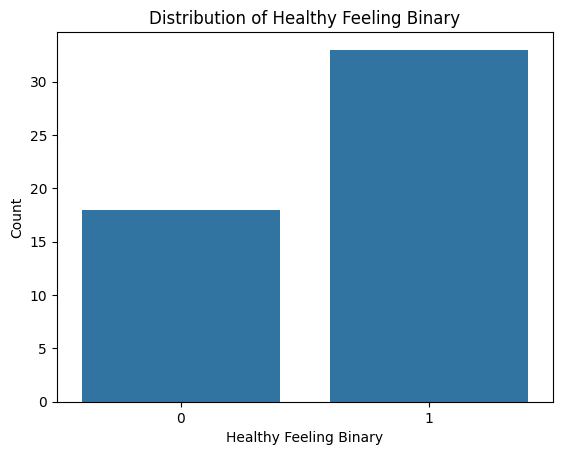

In [ ]:
#check the class distribution for the target
sns.countplot(x='healthy_feeling_binary', data=df)
plt.title("Distribution of Healthy Feeling Binary")
plt.xlabel('Healthy Feeling Binary')
plt.ylabel('Count')
plt.show()

In [ ]:
#define both the features and the target
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = df[features]
X = pd.DataFrame(imputer.fit_transform(X), columns=features)
y = df['healthy_feeling_binary']

Because of the class imabalnce observed in the distribution of the class, the dataset will be balanced using SMOTE which will create synthentic data for the minority class to match up with the majority class. This will give more dataset to train the predictive model with

In [ ]:
#apply smote for class balancing
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
#data splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
#scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training and Evaluating the Predictive Models

In [ ]:
#import the packages to use
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
#import the evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

**Training and Evaluating the Random Forest Classifier**

In [ ]:
#define the model
rf_model = RandomForestClassifier(random_state=42)
#train the model
rf_model.fit(X_train_scaled, y_train)
#make predictions with the model
rf_pred = rf_model.predict(X_test_scaled)
#evaluate the model performance
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(y_test, rf_pred, average='weighted')
print(f"Random Forest Precision: {rf_precision:.2f}")
print(f"Random Forest Recall: {rf_recall:.2f}")
print(f"Random Forest F1 Score: {rf_f1:.2f}")

Random Forest Accuracy: 0.86
Random Forest Precision: 0.86
Random Forest Recall: 0.86
Random Forest F1 Score: 0.86


In [ ]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.88      0.88      0.88         8

    accuracy                           0.86        14
   macro avg       0.85      0.85      0.85        14
weighted avg       0.86      0.86      0.86        14



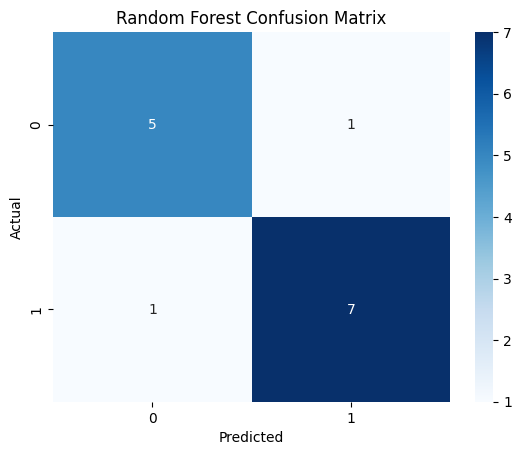

In [ ]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Training and Evaluating the Logistic Regression Model**

In [ ]:
lg_model = LogisticRegression(random_state=42)
lg_model.fit(X_train_scaled, y_train)
lg_pred = lg_model.predict(X_test_scaled)
lg_accuracy = accuracy_score(y_test, lg_pred)
print(f"Logistic Regression Accuracy: {lg_accuracy:.2f}")
lg_precision, lg_recall, lg_f1, _ = precision_recall_fscore_support(y_test, lg_pred, average='weighted')
print(f"Logistic Regression Precision: {lg_precision:.2f}")
print(f"Logistic Regression Recall: {lg_recall:.2f}")
print(f"Logistic Regression F1 Score: {lg_f1:.2f}")

Logistic Regression Accuracy: 0.93
Logistic Regression Precision: 0.94
Logistic Regression Recall: 0.93
Logistic Regression F1 Score: 0.93


In [ ]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lg_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.89      1.00      0.94         8

    accuracy                           0.93        14
   macro avg       0.94      0.92      0.93        14
weighted avg       0.94      0.93      0.93        14



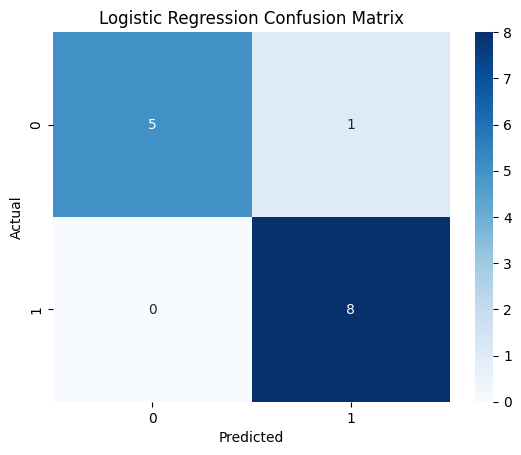

In [ ]:
sns.heatmap(confusion_matrix(y_test, lg_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Training and Evaluating the Support Vector Machine**

In [ ]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)
svc_pred = svc_model.predict(X_test_scaled)
svc_accuracy = accuracy_score(y_test, svc_pred)
print(f"Support Vector Machine Accuracy: {svc_accuracy:.2f}")
svc_precision, svc_recall, svc_f1, _ = precision_recall_fscore_support(y_test, svc_pred, average='weighted')
print(f"Support Vector Machine Precision: {svc_precision:.2f}")
print(f"Support Vector Machine Recall: {svc_recall:.2f}")
print(f"Support Vector Machine F1 Score: {svc_f1:.2f}")

Support Vector Machine Accuracy: 0.71
Support Vector Machine Precision: 0.74
Support Vector Machine Recall: 0.71
Support Vector Machine F1 Score: 0.71


In [ ]:
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svc_pred))

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.83      0.62      0.71         8

    accuracy                           0.71        14
   macro avg       0.73      0.73      0.71        14
weighted avg       0.74      0.71      0.71        14



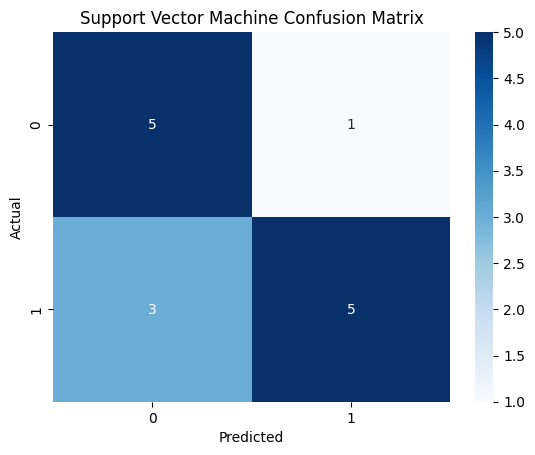

In [ ]:
sns.heatmap(confusion_matrix(y_test, svc_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Training and Evaluating XGBoost**

In [ ]:
xg_boost_model = XGBClassifier(random_state=42)
xg_boost_model.fit(X_train_scaled, y_train)
xg_boost_pred = xg_boost_model.predict(X_test_scaled)
xg_boost_accuracy = accuracy_score(y_test, xg_boost_pred)
print(f"XGBoost Accuracy: {xg_boost_accuracy:.2f}")
xgb_boost_precision, xgb_boost_recall, xgb_boost_f1, _ = precision_recall_fscore_support(y_test, xg_boost_pred, average = 'weighted')
print(f"XGBoost Precision: {xgb_boost_precision:.2f}")
print(f"XGBoost Recall: {xgb_boost_recall:.2f}")
print(f"XGBoost F1 Score: {xgb_boost_f1:.2f}")

XGBoost Accuracy: 0.79
XGBoost Precision: 0.80
XGBoost Recall: 0.79
XGBoost F1 Score: 0.79


In [ ]:
print("XGBoost Classification Report:")
print(classification_report(y_test, xg_boost_pred))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.86      0.75      0.80         8

    accuracy                           0.79        14
   macro avg       0.79      0.79      0.78        14
weighted avg       0.80      0.79      0.79        14



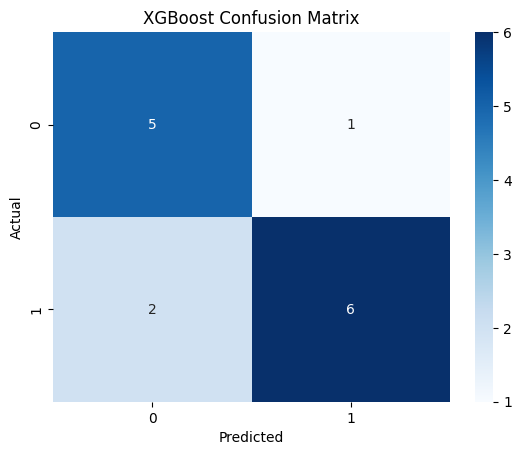

In [ ]:
sns.heatmap(confusion_matrix(y_test, xg_boost_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Computation of the Models Performances and Comparison

In [ ]:
#compute the performance of all the models
classification_results = pd.DataFrame(
    {
        'Model': ['Random Forest', 'Logistic Regression', 'Support Vector Machine', 'XGBoost'],
        'Accuracy': [rf_accuracy, lg_accuracy, svc_accuracy, xg_boost_accuracy],
        'Precision': [rf_precision, lg_precision, svc_precision, xgb_boost_precision],
        'Recall': [rf_recall, lg_recall, svc_recall, xgb_boost_recall],
        'F1 Score': [rf_f1, lg_f1, svc_f1, xgb_boost_f1]
    }

)

In [ ]:
classification_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.857143,0.857143,0.857143,0.857143
1,Logistic Regression,0.928571,0.936508,0.928571,0.927426
2,Support Vector Machine,0.714286,0.744048,0.714286,0.714286
3,XGBoost,0.785714,0.795918,0.785714,0.786813




* **Logistic Regression** performed the best overall with the highest accuracy, precision, and F1 score.
* **Random Forest** also performed well, with balanced metrics across the board.
* **XGBoost** had moderate performance, better than SVM but lower than Random Forest and Logistic Regression.
* **Support Vector Machine** had the lowest scores across all metrics, indicating weaker performance on this task.


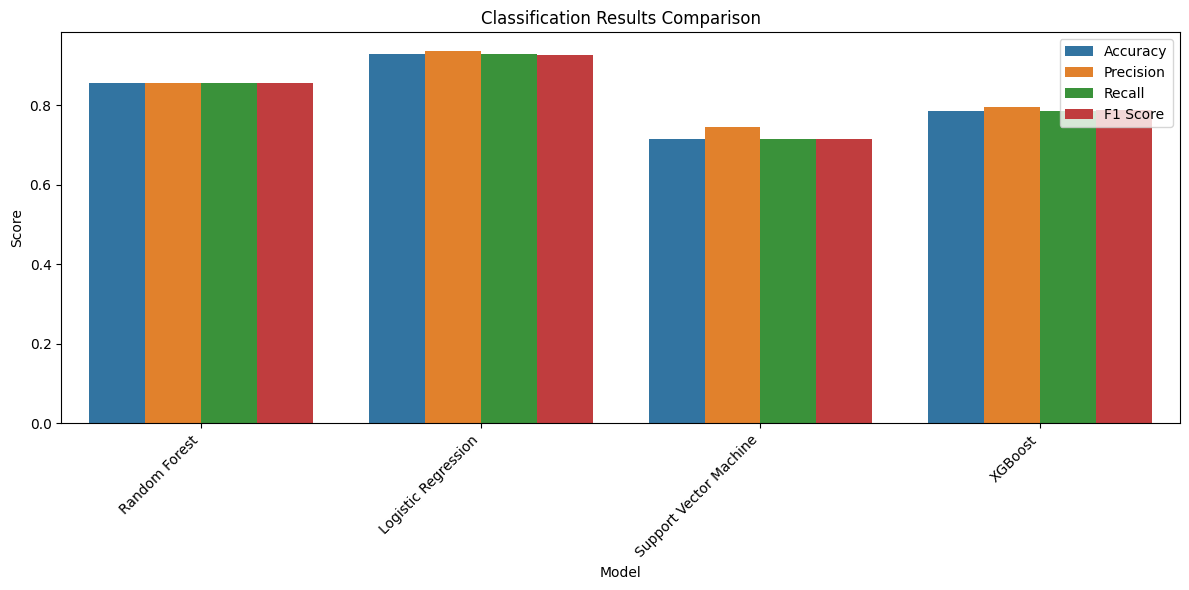

In [ ]:
#plot the performance
results_melted = pd.melt(classification_results, id_vars=['Model'], var_name='Metric', value_name='Score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted)
plt.title('Classification Results Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Analyzing the most important features in making the predictions from the best model**

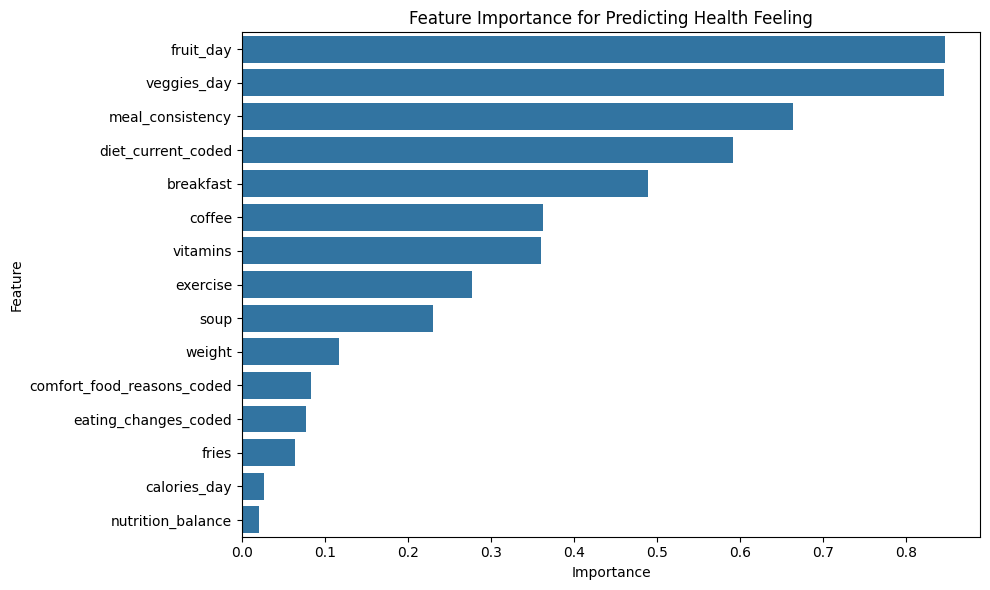

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(lg_model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Predicting Health Feeling')
plt.tight_layout()
plt.show()



**Top predictors**: Eating more fruits and veggies and sticking to regular meals matter most for feeling healthy.

**Other helpful habits**: Following a specific diet, eating breakfast, and even coffee or vitamins add value.

**Smaller effects**: Exercise, soup intake, and weight help a bit but less than expected.

**Least important**: Comfort food reasons, calorie count, and nutrition score barely affect how healthy people feel.

Boosting produce intake and meal consistency has the biggest impact on self-reported health.
